## CCI 501 - Machine Learning
**Univariate Linear Regression group assignment**
- Esther Mbithe - P52/37402/2020
- Kevin Odhiambo - P52/37678/2020
- Peter Kariuki Mutuura - P52/37710/2020


## Importing data and  the relevant libraries

In [519]:
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv("/home/user45/Downloads/2. data exploration - univariate/chennai_house_price_prediction.csv")
data.head()

,PRT_ID,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,131,1.0,1.0,3,AbNormal,Yes,Commercial,AllPub,Paved,A,4.0,3.9,4.9,4.330,144400,7600000
1,P09411,Anna Nagar,1986,26,2.0,1.0,5,AbNormal,No,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,304049,21717770
2,P01812,Adyar,909,70,1.0,1.0,3,AbNormal,Yes,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.090,92114,13159200
3,P05346,Velachery,1855,14,3.0,2.0,5,Family,No,Others,NoSewr,Paved,I,4.7,3.9,3.6,4.010,77042,9630290
4,P06210,Karapakkam,1226,84,1.0,1.0,3,AbNormal,Yes,Others,AllPub,Gravel,C,3.0,2.5,4.1,3.290,74063,7406250


In [520]:
data.corr()

,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,COMMIS,SALES_PRICE
INT_SQFT,1.000000,0.002022,0.786348,0.515390,0.951279,0.019850,-0.008337,0.008865,0.014025,0.571076,0.612125
DIST_MAINROAD,0.002022,1.000000,-0.002566,0.001970,0.002301,0.002237,-0.029468,0.001554,-0.017313,0.010994,0.018783
N_BEDROOM,0.786348,-0.002566,1.000000,0.755214,0.840286,0.015112,-0.007635,0.015569,0.014209,0.430424,0.330999
N_BATHROOM,0.515390,0.001970,0.755214,1.000000,0.568688,0.013112,-0.012057,0.013196,0.007907,0.256533,0.108884
N_ROOM,0.951279,0.002301,0.840286,0.568688,1.000000,0.016524,-0.007545,0.015072,0.015459,0.533343,0.602760
QS_ROOMS,0.019850,0.002237,0.015112,0.013112,0.016524,1.000000,0.008828,0.007789,0.517741,0.009377,0.021967
QS_BATHROOM,-0.008337,-0.029468,-0.007635,-0.012057,-0.007545,0.008828,1.000000,-0.011745,0.551125,-0.000471,-0.011377
QS_BEDROOM,0.008865,0.001554,0.015569,0.013196,0.015072,0.007789,-0.011745,1.000000,0.630447,0.020118,0.018804
QS_OVERALL,0.014025,-0.017313,0.014209,0.007907,0.015459,0.517741,0.551125,0.630447,1.000000,0.017004,0.020556
COMMIS,0.571076,0.010994,0.430424,0.256533,0.533343,0.009377,-0.000471,0.020118,0.017004,1.000000,0.626275


In [521]:
data.shape

(7109, 19)

In [545]:
stringtwo = ", ".join(map(str,data.columns.values))

In [546]:
stringtwo

'PRT_ID, AREA, INT_SQFT, DIST_MAINROAD, N_BEDROOM, N_BATHROOM, N_ROOM, SALE_COND, PARK_FACIL, BUILDTYPE, UTILITY_AVAIL, STREET, MZZONE, QS_ROOMS, QS_BATHROOM, QS_BEDROOM, QS_OVERALL, COMMIS, SALES_PRICE'

In [524]:
data.corr()['INT_SQFT'].sort_values(ascending=False)

INT_SQFT         1.000000
N_ROOM           0.951279
N_BEDROOM        0.786348
SALES_PRICE      0.612125
COMMIS           0.571076
N_BATHROOM       0.515390
QS_ROOMS         0.019850
QS_OVERALL       0.014025
QS_BEDROOM       0.008865
DIST_MAINROAD    0.002022
QS_BATHROOM     -0.008337
Name: INT_SQFT, dtype: float64

In [525]:
data.corr()['SALES_PRICE'].sort_values(ascending=False)

SALES_PRICE      1.000000
COMMIS           0.626275
INT_SQFT         0.612125
N_ROOM           0.602760
N_BEDROOM        0.330999
N_BATHROOM       0.108884
QS_ROOMS         0.021967
QS_OVERALL       0.020556
QS_BEDROOM       0.018804
DIST_MAINROAD    0.018783
QS_BATHROOM     -0.011377
Name: SALES_PRICE, dtype: float64

# Data Preprocessing 

In [529]:
housing_sales_price = data[['SALES_PRICE','INT_SQFT']]

In [547]:
housing_sales_price.isnull().sum()

SALES_PRICE    0
INT_SQFT       0
dtype: int64

In [530]:
housing_sales_price.corr()

,SALES_PRICE,INT_SQFT
SALES_PRICE,1.000000,0.612125
INT_SQFT,0.612125,1.000000


# Data visualization

In [531]:
#housing_sales_price  = housing_sales_price[0:3000]

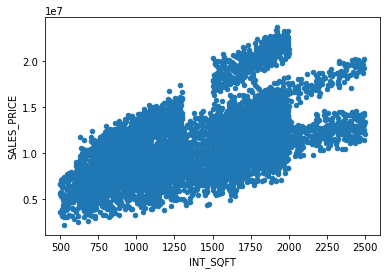

In [532]:
housing_sales_price.plot(kind="scatter",x="INT_SQFT",y="SALES_PRICE")
plt.show()

# Split data into train , validation , and test set

In [533]:
X = pd.DataFrame(housing_sales_price['INT_SQFT'])
Y = pd.DataFrame(housing_sales_price['SALES_PRICE'])

In [534]:
from sklearn.model_selection import train_test_split

X_train , X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=200)



# Train the Model

In [535]:
from sklearn import linear_model, metrics
import numpy as np
model = linear_model.LinearRegression()
model.fit(X_train , y_train)

LinearRegression()

In [536]:
print("Model coefficient : " ,model.coef_, "\n\n Model intercept : ",model.intercept_)

Model coefficient :  [[4964.81418485]] 

 Model intercept :  [4022777.51445733]


In [537]:
model.score(X_test,y_test)

0.402222166666651

In [538]:
X_train

,INT_SQFT
5031,917
5617,517
6101,1418
3597,768
3832,1934
...,...
2858,1884
5956,868
784,998
4713,1667


In [541]:
y_pred = model.predict(X_test)

In [544]:
np.sqrt(metrics.mean_squared_error(y_test,y_pred ))

2988547.685617177